<h1 align="center">Volume 4: River Crossing.</h1>

    NAME
    Section #
    DATE

In [24]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import root
from scipy.interpolate import barycentric_interpolate
from matplotlib import pyplot as plt

# Problem 1
Assume that the current is given by $c(x) = −
\frac{7}{10} (x^2 − 1)$. (This function assumes, for example, that the current is faster near the center of the river.) Write a Python
function that accepts as arguments a function $y$, its derivative $y'$, and an $x$-value, and returns $L(x, y(x), y'(x))$ (where $T[y]=\int^1_{-1} L(x,y(x),y'(x))dx$ Use that function to defune a second
function that numerically computes $T[y]$ for a given path $y(x)$.

In [9]:
def L1(x, y, yp):
    c = -7/10 * (x**2 - 1)
    a = 1 / np.sqrt(1 - c**2)
    return a * np.sqrt(1 + (a * yp(x))**2) - a**2 * c * yp(x)
def T1(y, yp):
    return quad(L1, -1, 1, args=(y, yp))[0]

# Problem 2

Let y(x) be the straight-line path between A = (−1, 0) and B = (1, 5). Numerically calculate T[y] to get an upper bound on the minimum time required to cross from A to
B. Using (18.2), find a lower bound on the minimum time required to cross.

In [17]:
y = lambda x: 2.5 * x + 2.5
yp = lambda x: 2.5
print('Upper bound:', T1(y, yp))

# Angle of secant that minimizes secant between -1 and 1 is 0
print('Lower bound:', quad(lambda x: 1 / np.cos(0), -1, 1)[0])

Upper bound: 3.8770820491384126
Lower bound: 2.0


# Problem 3

Numerically solve the Euler-Lagrange equation (18.4), using c(x) = −
7
10 (x
2 − 1)
and α = (1 − c
2
)
−1/2
, and y(−1) = 0, y(1) = 5.
Hint: Since this boundary value problem is defined over the doimain [−1, 1], it is easy to
solve using the pseudospectral method. Begin by replacing each d
dx with the pseudospectral
differentiation matrix D. Then impose the boundary conditions and solve.

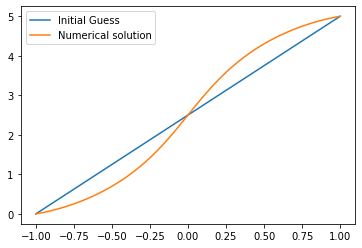

In [92]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

D, x = cheb(25)
y = lambda x: 2.5 * (x + 1)

def DLyp(y):
    c = -7/10 * (x**2 - 1)
    a = (1 - c**2)**(-1/2)
    yp = D @ y
    Lyp = a**3 * yp * (1 + (a*yp)**2)**(-1/2) - a**2 * c
    dLyp = D @ Lyp
    dLyp[0] = y[0] - 5
    dLyp[-1] = y[-1]
    return dLyp

sol = root(DLyp, y(x)).x
domain = np.linspace(-1, 1, 100)
interpolation = barycentric_interpolate(x, sol, domain)

plt.plot(x, y(x), label='Initial Guess')
plt.plot(domain, interpolation, label='Numerical solution')
plt.legend()
plt.show()

# Problem 4

Plot the angle at which the boat should be pointed at each $x$-coordinate. (Hint: use Equation 1.1; see Figure 1.3. Note that the angle the boat should be steered is NOT described by the tangent vector to the trjaectory)

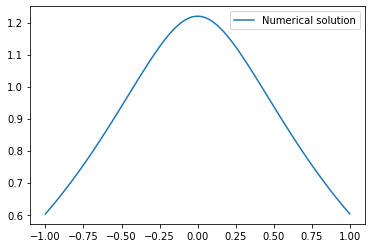

In [93]:
D, x = cheb(25)
y = sol

def func_7_1(theta):
    yp = D@y
    c = -7/10 * (x**2 - 1)
    return yp - c * (1/np.cos(theta)) - np.tan(theta)
sol1 = root(func_7_1, np.ones_like(x)).x

domain = np.linspace(-1, 1, 100)
interp1 = barycentric_interpolate(x, sol1, domain)
plt.plot(domain, interp1)
plt.show()